In [ ]:
WORKING_DIR = "/home/xavier/Documents/DAE_project"

# Processing results

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os

qualtric_expression = f"{WORKING_DIR}/human_evaluation/qualtrics_expression.xlsx"
qualtric_results = pd.read_csv(
    f"{WORKING_DIR}/human_evaluation/Evaluate the Fidelity and Alignment of AI-generated Microscopic Images of Myxococcus Xanthus_April 17, 2025_20.32.csv")
hist_out = f"{WORKING_DIR}/images/figure4/human_evaluation_nonexpert"
os.makedirs(hist_out, exist_ok=True)
qualtric_results

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,48_Alignment Question 2_4,49_Alignment Question 2_1,49_Alignment Question 2_2,49_Alignment Question 2_3,49_Alignment Question 2_4,50_Alignment Question 2_1,50_Alignment Question 2_2,50_Alignment Question 2_3,50_Alignment Question 2_4,index
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,index
1,"{""ImportId"":""startDate"",""timeZone"":""America/Ch...","{""ImportId"":""endDate"",""timeZone"":""America/Chic...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""48_QID24_22""}","{""ImportId"":""49_QID24_1""}","{""ImportId"":""49_QID24_20""}","{""ImportId"":""49_QID24_21""}","{""ImportId"":""49_QID24_22""}","{""ImportId"":""50_QID24_1""}","{""ImportId"":""50_QID24_20""}","{""ImportId"":""50_QID24_21""}","{""ImportId"":""50_QID24_22""}","{""ImportId"":""index""}"
2,2024-03-23 16:34:03,2024-03-23 17:03:06,IP Address,168.5.170.15,100,1742,True,2024-03-23 17:03:07,R_20jVM0kWu7SxfBq,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2024-03-25 15:10:43,2024-03-25 15:10:49,Survey Preview,NaN,100,5,True,2024-03-25 15:10:49,R_1dazMIioz7hTfYL,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2024-03-24 11:28:40,2024-03-26 09:08:16,IP Address,168.5.42.41,100,164376,True,2024-03-26 09:08:17,R_2S8X41sqkcxtc6R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107,2025-02-14 15:26:20,2025-02-14 16:22:17,IP Address,104.176.33.143,100,3356,True,2025-02-14 16:22:18,R_7IXcpYkyFHqKpst,NaN,...,Has several minor discrepancies,Has several minor discrepancies,Has significant discrepancies,Has significant discrepancies,Has several minor discrepancies,Has a few minor discrepancies,Has several minor discrepancies,Does not match at all,Has a few minor discrepancies,NaN
108,2025-02-14 15:11:31,2025-02-14 17:13:47,IP Address,168.5.46.128,100,7336,True,2025-02-14 17:13:48,R_3Oi6mvn1hxnvBES,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
109,2025-02-14 17:13:52,2025-02-14 17:14:01,IP Address,168.5.46.128,5,9,False,2025-02-21 17:14:04,R_6e37eKee1PIhmlb,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
110,2025-03-26 17:59:59,2025-03-26 18:15:40,IP Address,168.5.184.94,100,941,True,2025-03-26 18:15:41,R_3IQyJEsAEcAMJop,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Filter the responses
Comment line 42-43 to switch the survey group from all to expert.

In [2]:
def count_questions(df):
    section1 = [col for col in df.columns if "Fidelity Question " in col and '.' not in col]
    section2 = [col for col in df.columns if "Fidelity Question " in col and '.' in col]
    section3 = [col for col in df.columns if "Alignment Question 1_" in col]
    section4 = [col for col in df.columns if "Alignment Question 2_" in col]

    return {
        "Section 1": len(section1),
        "Section 2": len(section2),
        "Section 3": len(section3),
        "Section 4": len(section4)
    }


def non_nan_responses_table(df):
    sections = {
        "Section 1": [col for col in df.columns if "Fidelity Question " in col and '.' not in col],
        "Section 2": [col for col in df.columns if "Fidelity Question " in col and '.' in col],
        "Section 3": [col for col in df.columns if "Alignment Question 1_" in col],
        "Section 4": [col for col in df.columns if "Alignment Question 2_" in col]
    }

    results_df = pd.DataFrame(df['ResponseId'])  # Assuming 'ResponseId' is the identifier column

    for name, cols in sections.items():
        results_df[name + ' answers'] = df[cols].notna().sum(axis=1)

    return results_df


# Count questions in each section
questions_count = count_questions(qualtric_results)
print("Number of questions per section:", questions_count)

results_table = non_nan_responses_table(qualtric_results)
filtered_table = results_table[
    (results_table['Section 1 answers'] >= 0.9 * questions_count['Section 1']) |
    (results_table['Section 3 answers'] >= 0.9 * questions_count['Section 3'])
    ]
filtered_table = qualtric_results[qualtric_results.index.isin(filtered_table.index)]

# filtered_table = filtered_table[((filtered_table['Microscopy'] == 'Yes') &
#                                  (filtered_table['Experiment'] == 'Yes'))]
filtered_table = filtered_table[~((filtered_table['Microscopy'] == 'Yes') &
                                  (filtered_table['Experiment'] == 'Yes'))]
# filtered_table = qualtric_results[qualtric_results['Progress'] == '100']
filtered_table.to_csv(os.path.join(hist_out, "filtered_table.csv"), index=False)
filtered_table

Number of questions per section: {'Section 1': 169, 'Section 2': 156, 'Section 3': 200, 'Section 4': 200}


,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,48_Alignment Question 2_4,49_Alignment Question 2_1,49_Alignment Question 2_2,49_Alignment Question 2_3,49_Alignment Question 2_4,50_Alignment Question 2_1,50_Alignment Question 2_2,50_Alignment Question 2_3,50_Alignment Question 2_4,index
0,Start Date,End Date,Response Type,IP Address,Progress,Duration (in seconds),Finished,Recorded Date,Response ID,Recipient Last Name,...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,Question [CurrentLoopNumber]/50: How well does...,index
1,"{""ImportId"":""startDate"",""timeZone"":""America/Ch...","{""ImportId"":""endDate"",""timeZone"":""America/Chic...","{""ImportId"":""status""}","{""ImportId"":""ipAddress""}","{""ImportId"":""progress""}","{""ImportId"":""duration""}","{""ImportId"":""finished""}","{""ImportId"":""recordedDate"",""timeZone"":""America...","{""ImportId"":""_recordId""}","{""ImportId"":""recipientLastName""}",...,"{""ImportId"":""48_QID24_22""}","{""ImportId"":""49_QID24_1""}","{""ImportId"":""49_QID24_20""}","{""ImportId"":""49_QID24_21""}","{""ImportId"":""49_QID24_22""}","{""ImportId"":""50_QID24_1""}","{""ImportId"":""50_QID24_20""}","{""ImportId"":""50_QID24_21""}","{""ImportId"":""50_QID24_22""}","{""ImportId"":""index""}"
13,2024-06-04 13:48:45,2024-06-04 14:06:13,IP Address,195.145.158.123,43,1048,False,2024-06-11 14:06:15,R_22u7fMGhIRA9pGX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2024-06-19 01:58:38,2024-06-19 02:50:04,IP Address,129.132.215.16,100,3086,True,2024-06-19 02:50:06,R_8aKs0hMOPGRcvbG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2024-06-30 22:15:04,2024-07-01 02:06:27,IP Address,99.159.108.108,100,13882,True,2024-07-01 02:06:28,R_31zyFpgkZWmbjzQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2024-07-07 16:51:22,2024-07-07 18:11:06,IP Address,168.5.138.120,94,4783,False,2024-07-14 18:11:09,R_7MrPR0hPyZKjygz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2024-07-18 08:48:04,2024-07-19 09:51:09,IP Address,162.105.249.144,96,90184,False,2024-07-26 09:51:12,R_4BYvk8vVO9dAu2d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2024-07-19 23:33:31,2024-07-20 00:04:14,IP Address,98.40.176.125,87,1842,False,2024-07-27 00:04:19,R_3RomKU0xkrBO1Ut,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2024-07-28 22:23:12,2024-07-29 00:22:11,IP Address,73.206.181.47,100,7138,True,2024-07-29 00:22:13,R_7UfLnOQpJ1cpqXH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2024-07-29 08:53:16,2024-07-29 09:38:59,IP Address,123.121.189.80,100,2743,True,2024-07-29 09:39:02,R_4dE5PO9irhAu7ex,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Convert answers to scores

In [3]:
if 0 in filtered_table.index:
    answer_table = filtered_table.drop([0, 1])
else:
    answer_table = filtered_table

# Define mappings for Fidelity and Alignment questions
fidelity_mapping = {
    "AI-generated image": 1,
    "Probably an AI-generated image, but photorealistic": 2,
    "Neutral": 3,
    "Probably a real image, but the bacteria looks irregular": 4,
    "Real image": 5
}

alignment_mapping = {
    "Does not match at all": 1,
    "Has significant discrepancies": 2,
    "Has several minor discrepancies": 3,
    "Has a few minor discrepancies": 4,
    "Matches exactly": 5
}

# Apply mappings to the respective columns
for col in answer_table.columns:
    if 'Fidelity Question' in col:
        answer_table[col] = answer_table[col].map(fidelity_mapping)
    elif 'Alignment Question' in col:
        answer_table[col] = answer_table[col].map(alignment_mapping)
# answer_table = answer_table.fillna(3)
answer_table

,StartDate,EndDate,Status,IPAddress,Progress,Duration (in seconds),Finished,RecordedDate,ResponseId,RecipientLastName,...,48_Alignment Question 2_4,49_Alignment Question 2_1,49_Alignment Question 2_2,49_Alignment Question 2_3,49_Alignment Question 2_4,50_Alignment Question 2_1,50_Alignment Question 2_2,50_Alignment Question 2_3,50_Alignment Question 2_4,index
13,2024-06-04 13:48:45,2024-06-04 14:06:13,IP Address,195.145.158.123,43,1048,False,2024-06-11 14:06:15,R_22u7fMGhIRA9pGX,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28,2024-06-19 01:58:38,2024-06-19 02:50:04,IP Address,129.132.215.16,100,3086,True,2024-06-19 02:50:06,R_8aKs0hMOPGRcvbG,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
33,2024-06-30 22:15:04,2024-07-01 02:06:27,IP Address,99.159.108.108,100,13882,True,2024-07-01 02:06:28,R_31zyFpgkZWmbjzQ,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48,2024-07-07 16:51:22,2024-07-07 18:11:06,IP Address,168.5.138.120,94,4783,False,2024-07-14 18:11:09,R_7MrPR0hPyZKjygz,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
67,2024-07-18 08:48:04,2024-07-19 09:51:09,IP Address,162.105.249.144,96,90184,False,2024-07-26 09:51:12,R_4BYvk8vVO9dAu2d,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
70,2024-07-19 23:33:31,2024-07-20 00:04:14,IP Address,98.40.176.125,87,1842,False,2024-07-27 00:04:19,R_3RomKU0xkrBO1Ut,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,2024-07-28 22:23:12,2024-07-29 00:22:11,IP Address,73.206.181.47,100,7138,True,2024-07-29 00:22:13,R_7UfLnOQpJ1cpqXH,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74,2024-07-29 08:53:16,2024-07-29 09:38:59,IP Address,123.121.189.80,100,2743,True,2024-07-29 09:39:02,R_4dE5PO9irhAu7ex,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
77,2024-07-31 19:39:47,2024-07-31 20:21:56,IP Address,72.43.172.89,100,2528,True,2024-07-31 20:21:57,R_1fIZqTe6WRKJob7,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
80,2024-07-28 21:58:55,2024-07-28 23:35:33,IP Address,174.204.2.37,45,5798,False,2024-08-04 23:35:34,R_6GZgygtQO9vXh2B,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Align questions with images

In [4]:
fidelity_info = pd.read_excel(qualtric_expression, sheet_name='fidelity_source')
fidelity_original_name = pd.read_excel(qualtric_expression, sheet_name='fidelity')
alignment_info = pd.read_excel(qualtric_expression, sheet_name='alignment')

details = []
col2sou = {1: "image_expression_r", 2: "image_expression_cp", 3: "image_expression_stylegan2",
           4: "image_expression_dim13"}

for col in filtered_table.columns:
    if 'Fidelity Question' in col:
        clean_col = col.replace(' ', '_')
        parts = clean_col.split('_')
        row_id = int(parts[0])
        col_id = int(parts[-1].split('.')[0])
        if '.' in parts[-1]:
            row_id += 13

        if row_id - 1 < len(fidelity_info) and col_id < len(fidelity_info.columns):
            value = fidelity_info.iloc[row_id - 1, col_id]
            column_name = value.replace("image_expression", "img_name")
            image_name = fidelity_original_name.iloc[row_id - 1][column_name]
            if image_name.startswith('dim_13'):
                image_source = "our"
            elif image_name.startswith('seed'):
                image_source = "stylegan2"
            elif image_name.startswith('stylegan3'):
                image_source = "stylegan3"
            else:
                image_source = "real"
            details.append({'Column Name': col, 'Row ID': row_id, 'Column ID': col_id, 'Original Column': image_source})
    elif 'Alignment Question' in col:
        clean_col = col.replace(' ', '_')
        parts = clean_col.split('_')
        row_id = int(parts[0])
        col_id = int(parts[-1])
        section_id = int(parts[-2])
        if section_id == 2:
            row_id += 50

        details.append({'Column Name': col, 'Row ID': row_id, 'Column ID': col_id, 'Original Column': col2sou[col_id]})

details_table = pd.DataFrame(details)

details_table

,Column Name,Row ID,Column ID,Original Column
0,1_Alignment Question 1_1,1,1,image_expression_r
1,1_Alignment Question 1_2,1,2,image_expression_cp
2,1_Alignment Question 1_3,1,3,image_expression_stylegan2
3,1_Alignment Question 1_4,1,4,image_expression_dim13
4,2_Alignment Question 1_1,2,1,image_expression_r
...,...,...,...,...
720,49_Alignment Question 2_4,99,4,image_expression_dim13
721,50_Alignment Question 2_1,100,1,image_expression_r
722,50_Alignment Question 2_2,100,2,image_expression_cp
723,50_Alignment Question 2_3,100,3,image_expression_stylegan2


## Fidelity analysis

In [5]:
from scipy.stats import f_oneway
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import numpy as np

source_map = {}
for index, row in details_table.iterrows():
    if "Fidelity Question" in row['Column Name'] and '.' not in row['Column Name']:
        prefix = row['Original Column'].split('_')[0]  # Extracts 'our', 'real', 'stylegan2', 'stylegan3'
        source_map[row['Column Name']] = prefix

grouped_scores = {'real': [], 'our': [], 'stylegan2': [], 'stylegan3': []}

## Sanity check
sanity_check = []
for col in answer_table.columns:
    if col in source_map:
        if source_map[col] == 'stylegan3':
            sanity_check.append(col)

# Remove invalid answers
valid_rows = answer_table[sanity_check].apply(lambda x: any(x == 1), axis=1)
print(f"{sum(valid_rows)} out of {len(answer_table)} valid answers.")
answer_table = answer_table[valid_rows]
print(f"{len(answer_table[((answer_table['Microscopy'] == 'Yes') & (answer_table['Experiment'] == 'Yes'))])} experts.")

for col in answer_table.columns:
    if col in source_map:
        # Append the scores of the column to the appropriate group
        grouped_scores[source_map[col]].extend(answer_table[col].dropna().tolist())
# Convert lists to arrays for statistical analysis
for key in grouped_scores:
    grouped_scores[key] = pd.Series(grouped_scores[key])
# del grouped_scores['stylegan3']
score_lists = [group for group in grouped_scores.values() if len(group) > 0]  # Ensure there are scores to analyze

fidelity_report = open(os.path.join(hist_out, "fidelity_report.txt"), "w")

# Perform ANOVA across the groups
anova_result = f_oneway(*score_lists)
print(f"ANOVA Result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")
fidelity_report.write(f"ANOVA Result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}\n")
if anova_result.pvalue < 0.05:
    # Implement pairwise t-tests or Tukey's HSD here if needed
    print("Significant differences detected, consider pairwise comparisons.")

21 out of 24 valid answers.
0 experts.
ANOVA Result: F-statistic = 367.759531015807, P-value = 6.086660563560997e-208
Significant differences detected, consider pairwise comparisons.


In [6]:
def hedges_g(mean1, mean2, sd1, sd2, n1, n2):
    pooled_sd = np.sqrt(((n1 - 1) * sd1 ** 2 + (n2 - 1) * sd2 ** 2) / (n1 + n2 - 2))
    g = (mean1 - mean2) / pooled_sd
    # Apply correction for small sample bias
    correction = 1 - (3 / (4 * (n1 + n2) - 9))
    return g * correction


data = []
for group, scores in grouped_scores.items():
    for score in scores:
        data.append({'score': score, 'group': group})

df = pd.DataFrame(data)

tukey_results = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)

tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
hedges_g_values = []
for i in range(len(tukey_df)):
    group1 = tukey_df.loc[i, 'group1']
    group2 = tukey_df.loc[i, 'group2']

    # Get data for each group
    group1_scores = df[df['group'] == group1]['score']
    group2_scores = df[df['group'] == group2]['score']

    # Compute statistics
    mean1, mean2 = np.mean(group1_scores), np.mean(group2_scores)
    sd1, sd2 = np.std(group1_scores, ddof=1), np.std(group2_scores, ddof=1)
    n1, n2 = len(group1_scores), len(group2_scores)

    # Calculate Hedge's g
    g = hedges_g(mean1, mean2, sd1, sd2, n1, n2)
    hedges_g_values.append(g)

# Add Hedge's g column to Tukey results table
tukey_df['Hedge’s g'] = hedges_g_values
print(tukey_df)

fidelity_report.write(f"{tukey_df}\n")

fidelity_report.close()

      group1     group2  meandiff   p-adj   lower   upper  reject  Hedge’s g
0        our       real   -0.1749  0.0015 -0.2982 -0.0516    True   0.151547
1        our  stylegan2   -0.1612  0.0044 -0.2845 -0.0378    True   0.140165
2        our  stylegan3   -2.4405  0.0000 -2.6355 -2.2455    True   2.408360
3       real  stylegan2    0.0137  0.9918 -0.1096  0.1371   False  -0.011599
4       real  stylegan3   -2.2656  0.0000 -2.4606 -2.0706    True   2.107566
5  stylegan2  stylegan3   -2.2793  0.0000 -2.4743 -2.0843    True   2.134969


In [7]:
# Generate LaTeX table
groups = list(grouped_scores.keys())
# groups = ['real', 'our', 'stylegan2']
# Generate LaTeX table with only the lower triangle values
latex_table = r"""\begin{tabular}{l""" + "c" * len(groups) + r"""}
\toprule
 & """ + " & ".join(groups) + r""" \\
\midrule
"""

for i, group1 in enumerate(groups):
    row = [group1]  # Start row with group name
    for j, group2 in enumerate(groups):
        if i == j:
            row.append("-")  # Diagonal elements should be "-"
        elif i > j:  # Only keep lower triangle values
            # Find corresponding row in tukey_df
            result = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                              ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]

            if not result.empty:
                p_value = result.iloc[0]['p-adj']
                effect_size = result.iloc[0]['Hedge’s g']
                row.append(f"{p_value:.4f} ({effect_size:.2f})")
            else:
                row.append("-")
        else:
            row.append("")  # Keep upper triangle empty for symmetry

    latex_table += "\n" + " & ".join(row) + r" \\"

# Finalizing table
latex_table += r"""
\bottomrule
\end{tabular}
"""

# Display the updated LaTeX table with lower triangle values only
print(latex_table)


\begin{tabular}{lcccc}
\toprule
 & real & our & stylegan2 & stylegan3 \\
\midrule

real & - &  &  &  \\
our & 0.0015 (0.15) & - &  &  \\
stylegan2 & 0.9918 (-0.01) & 0.0044 (0.14) & - &  \\
stylegan3 & 0.0000 (2.11) & 0.0000 (2.41) & 0.0000 (2.13) & - \\
\bottomrule
\end{tabular}



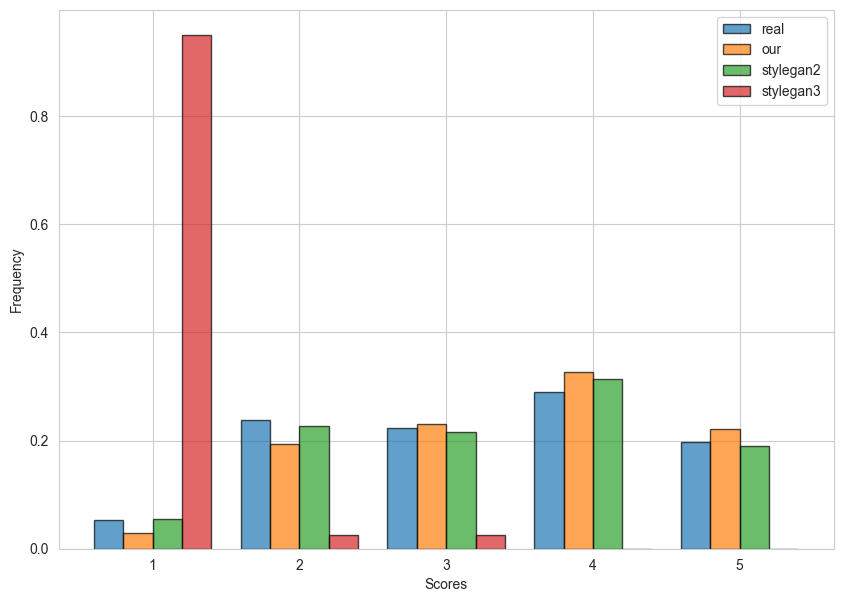

In [8]:
reversed_fidelity_mapping = {v: k for k, v in fidelity_mapping.items()}

import matplotlib as mpl

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = ['Arial', 'DejaVu Sans']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['text.usetex'] = False


def style_ax(ax):
    """
    Unified styling:
    - Gray borders
    - Dashed grid behind all artists, alpha=0.5
    - No tick marks ("little spikes")
    - Transparent background
    """
    ax.set_facecolor('none')
    # Gray frame
    for spine in ax.spines.values():
        spine.set_edgecolor('dimgray')
        spine.set_linewidth(1.2)
    # Grid under everything
    ax.set_axisbelow(True)
    ax.grid(True, axis='x', linestyle='--', alpha=0.5, zorder=0)
    # Remove tick spikes
    ax.tick_params(axis='both', which='both', length=0)


# Plot histograms
plt.figure(figsize=(10, 7))
plt.hist(grouped_scores.values(), bins=np.arange(1, 7) - 0.5, label=list(grouped_scores.keys()), alpha=0.7,
         edgecolor='black', density=True)  # Use density=True for normalization
plt.xlabel('Scores')
plt.ylabel('Frequency')
# plt.title('Normalized Histogram of Groups')
plt.xticks(range(1, 6))  #, [reversed_fidelity_mapping[i] for i in range(1, 6)])  # Set custom x-ticks based on mapping
plt.legend()
plt.savefig(os.path.join(hist_out, "fidelity.pdf"))
plt.savefig(os.path.join(hist_out, "fidelity.png"))

In [9]:
fidelity_stats = pd.DataFrame(columns=['group', 'mean', 'std'])
for idx, item in enumerate(grouped_scores):
    fidelity_stats.loc[idx] = [item, np.mean(grouped_scores[item]), np.std(grouped_scores[item])]
fidelity_stats.to_csv(os.path.join(hist_out, "fidelity_stats.csv"))
fidelity_stats

,group,mean,std
0,real,3.342491,1.187507
1,our,3.517399,1.117899
2,stylegan2,3.356227,1.179195
3,stylegan3,1.076923,0.349697


# Show bar plots

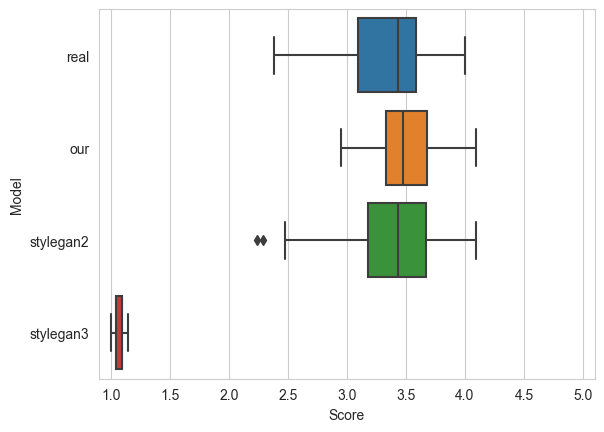

In [10]:
import seaborn as sns

cols_to_use = [c for c in answer_table.columns if c in source_map]
df_fidelity = answer_table[cols_to_use].copy()
df_fidelity = df_fidelity.rename(columns=source_map)
mean_fidelity = df_fidelity.mean()
mean_fidelity_df = mean_fidelity.reset_index()
mean_fidelity_df.columns = ['Model', 'Score']
name_order_fidelity = ["real", "our", "stylegan2", "stylegan3"]
sns.boxplot(y='Model', x='Score', data=mean_fidelity_df, order=name_order_fidelity)
# plt.xlabel("Human Evaluation Score")
plt.xlim(0.9, 5.1)
plt.savefig(os.path.join(hist_out, "fidelity_bar.pdf"))
plt.savefig(os.path.join(hist_out, "fidelity_bar.png"))

In [11]:
df = mean_fidelity_df
tukey_results = pairwise_tukeyhsd(endog=df['Score'], groups=df['Model'], alpha=0.05)

tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
hedges_g_values = []
for i in range(len(tukey_df)):
    group1 = tukey_df.loc[i, 'group1']
    group2 = tukey_df.loc[i, 'group2']

    # Get data for each group
    group1_scores = df[df['Model'] == group1]['Score']
    group2_scores = df[df['Model'] == group2]['Score']

    # Compute statistics
    mean1, mean2 = np.mean(group1_scores), np.mean(group2_scores)
    sd1, sd2 = np.std(group1_scores, ddof=1), np.std(group2_scores, ddof=1)
    n1, n2 = len(group1_scores), len(group2_scores)

    # Calculate Hedge's g
    g = hedges_g(mean1, mean2, sd1, sd2, n1, n2)
    hedges_g_values.append(g)

# Add Hedge's g column to Tukey results table
tukey_df['Hedge’s g'] = hedges_g_values
# Generate LaTeX table
groups = list(grouped_scores.keys())
# groups = ['real', 'our', 'stylegan2']
# Generate LaTeX table with only the lower triangle values
latex_table = r"""\begin{tabular}{l""" + "c" * (len(groups)) + r"""}
\toprule
 & """ + " & ".join(groups) + r""" \\
\midrule"""

for i, group1 in enumerate(groups):
    row = [group1]  # Start row with group name
    for j, group2 in enumerate(groups):
        if i == j:
            row.append("-")  # Diagonal elements should be "-"
        elif i > j:  # Only keep lower triangle values
            # Find corresponding row in tukey_df
            result = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                              ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]

            if not result.empty:
                p_value = result.iloc[0]['p-adj']
                effect_size = result.iloc[0]['Hedge’s g']
                row.append(f"{p_value:.4f} ({effect_size:.2f})")
            else:
                row.append("-")
        else:
            row.append(" - ")  # Keep upper triangle empty for symmetry

    latex_table += "\n" + " & ".join(row) + r" \\"

# Finalizing table
latex_table += r"""
\bottomrule
\end{tabular}
"""

# Display the updated LaTeX table with lower triangle values only
print(latex_table)


\begin{tabular}{lcccc}
\toprule
 & real & our & stylegan2 & stylegan3 \\
\midrule
real & - &  -  &  -  &  -  \\
our & 0.0599 (0.54) & - &  -  &  -  \\
stylegan2 & 0.9972 (-0.03) & 0.0963 (0.45) & - &  -  \\
stylegan3 & 0.0000 (6.41) & 0.0000 (11.13) & 0.0000 (5.64) & - \\
\bottomrule
\end{tabular}



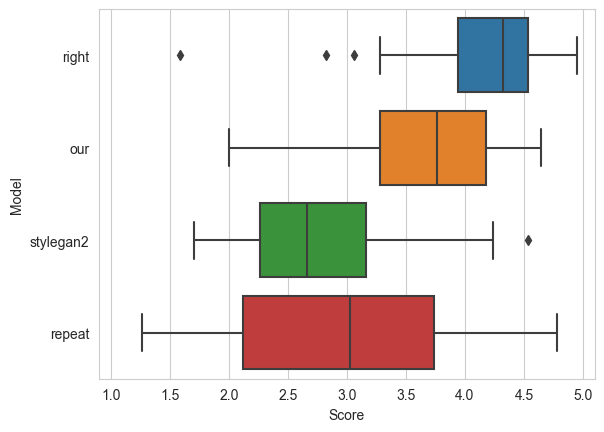

In [12]:
source_map_align = {}
for index, row in details_table.iterrows():
    if "Alignment Question" in row['Column Name'] and ' 2_' not in row['Column Name']:
        prefix = row['Original Column'].split('_')[-1]  # Extracts 'our', 'real', 'stylegan2', 'stylegan3'
        if prefix == "r":
            prefix = "right"
        elif prefix == "cp":
            prefix = "repeat"
        elif prefix == "dim13":
            prefix = "our"
        source_map_align[row['Column Name']] = prefix

cols_to_use = [c for c in answer_table.columns if c in source_map_align]
df_align = answer_table[cols_to_use].copy()
df_align = df_align.rename(columns=source_map_align)
mean_align = df_align.mean()
mean_align_df = mean_align.reset_index()
mean_align_df.columns = ['Model', 'Score']
name_order_align = ["right", "our", "stylegan2", "repeat"]
sns.boxplot(y='Model', x='Score', data=mean_align_df, order=name_order_align)
# sns.swarmplot(y='Model', x='Score', data=mean_scores_df, color=".25", dodge=True)
# plt.title("Comparison of Models (Fidelity)")
# plt.xlabel("Human Evaluation Score")
plt.xlim(0.9, 5.1)
plt.savefig(os.path.join(hist_out, "alignment_bar.pdf"))
plt.savefig(os.path.join(hist_out, "alignment_bar.png"))

In [13]:
df = mean_align_df
tukey_results = pairwise_tukeyhsd(endog=df['Score'], groups=df['Model'], alpha=0.05)

tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
hedges_g_values

[0.5394085602598259,
 0.44946468254111244,
 11.133903765356854,
 -0.032787738371649076,
 6.414808736636985,
 5.644917315016147]

In [14]:
df = mean_align_df
tukey_results = pairwise_tukeyhsd(endog=df['Score'], groups=df['Model'], alpha=0.05)

tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
hedges_g_values = []
for i in range(len(tukey_df)):
    group1 = tukey_df.loc[i, 'group1']
    group2 = tukey_df.loc[i, 'group2']

    # Get data for each group
    group1_scores = df[df['Model'] == group1]['Score']
    group2_scores = df[df['Model'] == group2]['Score']

    # Compute statistics
    mean1, mean2 = np.mean(group1_scores), np.mean(group2_scores)
    sd1, sd2 = np.std(group1_scores, ddof=1), np.std(group2_scores, ddof=1)
    n1, n2 = len(group1_scores), len(group2_scores)

    # Calculate Hedge's g
    g = hedges_g(mean1, mean2, sd1, sd2, n1, n2)
    hedges_g_values.append(g)

# Add Hedge's g column to Tukey results table
tukey_df['Hedge’s g'] = hedges_g_values
# Generate LaTeX table
groups = ['right', 'our', 'stylegan2', 'repeat']
# Generate LaTeX table with only the lower triangle values
latex_table = r"""\begin{tabular}{l""" + "c" * (len(groups)) + r"""}
\toprule
 & """ + " & ".join(groups) + r""" \\
\midrule"""

for i, group1 in enumerate(groups):
    row = [group1]  # Start row with group name
    for j, group2 in enumerate(groups):
        if i == j:
            row.append("-")  # Diagonal elements should be "-"
        elif i > j:  # Only keep lower triangle values
            # Find corresponding row in tukey_df
            result = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                              ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]

            if not result.empty:
                p_value = result.iloc[0]['p-adj']
                effect_size = result.iloc[0]['Hedge’s g']
                row.append(f"{p_value:.4f} ({effect_size:.2f})")
            else:
                row.append("-")
        else:
            row.append(" - ")  # Keep upper triangle empty for symmetry

    latex_table += "\n" + " & ".join(row) + r" \\"

# Finalizing table
latex_table += r"""
\bottomrule
\end{tabular}
"""

# Display the updated LaTeX table with lower triangle values only
print(latex_table)


\begin{tabular}{lcccc}
\toprule
 & right & our & stylegan2 & repeat \\
\midrule
right & - &  -  &  -  &  -  \\
our & 0.0028 (-0.82) & - &  -  &  -  \\
stylegan2 & 0.0000 (2.06) & 0.0000 (1.18) & - &  -  \\
repeat & 0.0000 (-1.44) & 0.0002 (0.75) & 0.5415 (0.23) & - \\
\bottomrule
\end{tabular}



## Alignment analysis

In [15]:
group_mapping = {
    1: 'right',
    2: 'repeat',
    3: 'stylegan2',
    4: 'dim13'
}

# Initialize a dictionary to hold scores by groups
alignment_scores = {name: [] for name in group_mapping.values()}

# Filter and process columns relevant to Alignment Questions
for col in answer_table.columns:
    if 'Alignment Question 1_' in col:
        # Parse the group number from the column name
        group_number = int(col.split('_')[-1])  # Assumes the last part of the name is the group number
        group_name = group_mapping.get(group_number)

        # If the group name exists, extend the list with scores from this column
        if group_name:
            alignment_scores[group_name].extend(answer_table[col].dropna().tolist())

# Convert lists to arrays for statistical analysis
for key in alignment_scores:
    alignment_scores[key] = pd.Series(alignment_scores[key])

# Step 2: Perform ANOVA to check for significant differences
# Extracting the score lists
score_lists = [group for group in alignment_scores.values() if len(group) > 0]  # Ensure there are scores to analyze

alignment_report = open(os.path.join(hist_out, "alignment_report.txt"), "w")
# Perform ANOVA across the groups
anova_result = f_oneway(*score_lists)
alignment_report.write(f"ANOVA Result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}\n")
print(f"ANOVA Result: F-statistic = {anova_result.statistic}, P-value = {anova_result.pvalue}")

# Step 3: Tukey HSD if ANOVA shows significance
# Flatten the scores and labels for Tukey's test
data = []
for group, scores in alignment_scores.items():
    for score in scores:
        data.append({'score': score, 'group': group})
df = pd.DataFrame(data)

# Perform Tukey's HSD test
tukey_results = pairwise_tukeyhsd(endog=df['score'], groups=df['group'], alpha=0.05)

# Optional: Convert Tukey's results to a matrix of p-values
tukey_df = pd.DataFrame(data=tukey_results._results_table.data[1:], columns=tukey_results._results_table.data[0])
hedges_g_values = []
for i in range(len(tukey_df)):
    group1 = tukey_df.loc[i, 'group1']
    group2 = tukey_df.loc[i, 'group2']

    # Get data for each group
    group1_scores = df[df['group'] == group1]['score']
    group2_scores = df[df['group'] == group2]['score']

    # Compute statistics
    mean1, mean2 = np.mean(group1_scores), np.mean(group2_scores)
    sd1, sd2 = np.std(group1_scores, ddof=1), np.std(group2_scores, ddof=1)
    n1, n2 = len(group1_scores), len(group2_scores)

    # Calculate Hedge's g
    g = hedges_g(mean1, mean2, sd1, sd2, n1, n2)
    hedges_g_values.append(g)

# Add Hedge's g column to Tukey results table
tukey_df['Hedge’s g'] = hedges_g_values
print(tukey_df)

alignment_report.write(f"{tukey_df}\n")

alignment_report.close()

ANOVA Result: F-statistic = 254.12801744768967, P-value = 4.866559382339684e-149
   group1     group2  meandiff   p-adj   lower   upper  reject  Hedge’s g
0   dim13     repeat   -0.6409  0.0000 -0.7850 -0.4967    True   0.513244
1   dim13      right    0.5473  0.0000  0.4032  0.6915    True  -0.514112
2   dim13  stylegan2   -0.8406  0.0000 -0.9848 -0.6965    True   0.713843
3  repeat      right    1.1882  0.0000  1.0441  1.3324    True  -1.026832
4  repeat  stylegan2   -0.1998  0.0021 -0.3439 -0.0556    True   0.158307
5   right  stylegan2   -1.3880  0.0000 -1.5321 -1.2439    True   1.285025


In [16]:
# Generate LaTeX table
# groups = list(alignment_scores.keys())
groups = ['right', 'dim13', 'stylegan2', 'repeat']
# Generate LaTeX table with only the lower triangle values
latex_table = r"""\begin{tabular}{l""" + "c" * len(groups) + r"""}
\toprule
 & """ + " & ".join(groups) + r""" \\
\midrule
"""

for i, group1 in enumerate(groups):
    row = [group1]  # Start row with group name
    for j, group2 in enumerate(groups):
        if i == j:
            row.append("-")  # Diagonal elements should be "-"
        elif i > j:  # Only keep lower triangle values
            # Find corresponding row in tukey_df
            result = tukey_df[((tukey_df['group1'] == group1) & (tukey_df['group2'] == group2)) |
                              ((tukey_df['group1'] == group2) & (tukey_df['group2'] == group1))]

            if not result.empty:
                p_value = result.iloc[0]['p-adj']
                effect_size = result.iloc[0]['Hedge’s g']
                row.append(f"{p_value:.4f} ({effect_size:.2f})")
            else:
                row.append("-")
        else:
            row.append("")  # Keep upper triangle empty for symmetry

    latex_table += "\n" + " & ".join(row) + r" \\"

# Finalizing table
latex_table += r"""
\bottomrule
\end{tabular}
"""

# Display the updated LaTeX table with lower triangle values only
print(latex_table)


\begin{tabular}{lcccc}
\toprule
 & right & dim13 & stylegan2 & repeat \\
\midrule

right & - &  &  &  \\
dim13 & 0.0000 (-0.51) & - &  &  \\
stylegan2 & 0.0000 (1.29) & 0.0000 (0.71) & - &  \\
repeat & 0.0000 (-1.03) & 0.0000 (0.51) & 0.0021 (0.16) & - \\
\bottomrule
\end{tabular}



In [17]:
alignment_stats = pd.DataFrame(columns=['group', 'mean', 'std'])
for idx, item in enumerate(alignment_scores):
    alignment_stats.loc[idx] = [item, np.mean(alignment_scores[item]), np.std(alignment_scores[item])]
alignment_stats.to_csv(os.path.join(hist_out, "alignment_stats.csv"))
alignment_stats

,group,mean,std
0,right,4.158199,0.954706
1,repeat,2.969977,1.327111
2,stylegan2,2.770208,1.190451
3,dim13,3.610855,1.162272


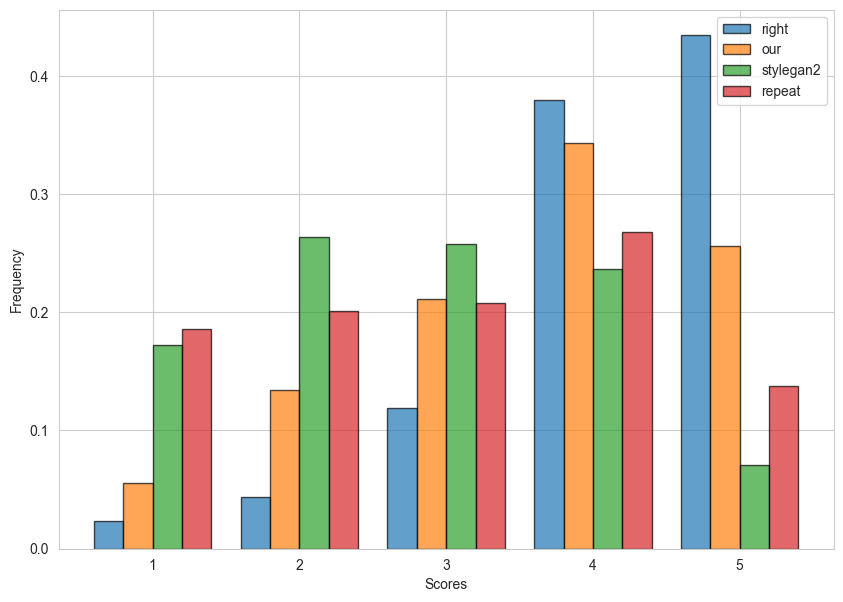

In [18]:
alignment_scores = {group_id: np.zeros([50, len(answer_table)]) for group_id in range(1, 5)}  # Assuming groups 1 to 4
for col in answer_table.columns:
    if 'Alignment Question 1_' in col:
        parts = col.split('_')
        question_id = int(parts[0])
        group_id = int(parts[-1])  # The last part is the group_id
        alignment_scores[group_id][question_id - 1] = answer_table[col]

data = [alignment_scores[i].flatten() for i in [1, 4, 3, 2]]
labels = ["right", "our", "stylegan2", "repeat"]
plt.figure(figsize=(10, 7))
plt.hist(data, bins=np.arange(1, 7) - 0.5, label=labels, alpha=0.7, edgecolor='black', density='True')
plt.xlabel('Scores')
plt.ylabel('Frequency')
# plt.title('Histogram of Groups')
plt.xticks(range(1, 6))
plt.legend()
plt.savefig(os.path.join(hist_out, "alignment_scores.pdf"))

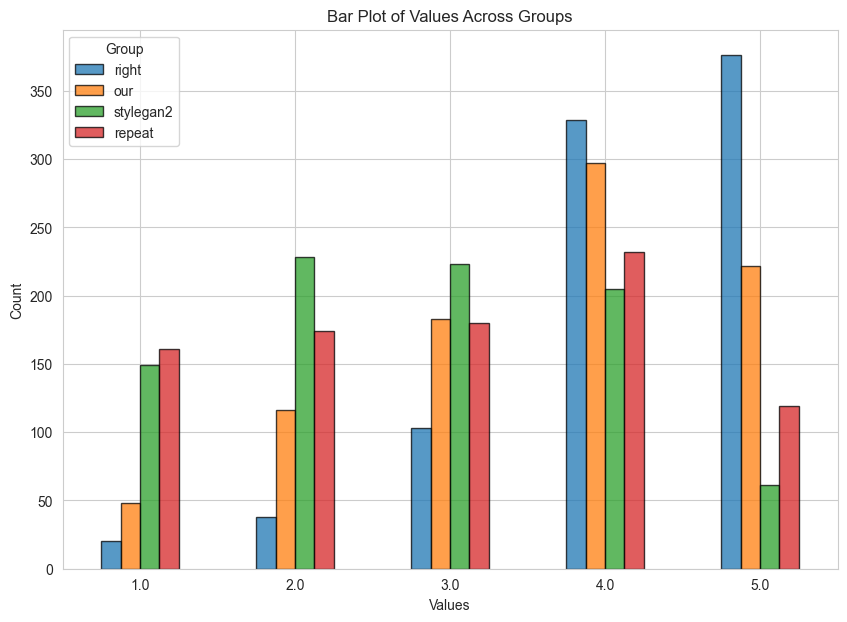

In [19]:
import pandas as pd

group_data = pd.DataFrame({l: d for d, l in zip(data, labels)})

# Plotting the bar plot
fig, ax = plt.subplots(figsize=(10, 7))
group_data.apply(pd.Series.value_counts).plot(kind='bar', ax=ax, alpha=0.75, edgecolor='black')
ax.set_xlabel('Values')
ax.set_ylabel('Count')
ax.set_title('Bar Plot of Values Across Groups')
plt.xticks(rotation=0)
plt.legend(title='Group')
plt.show()

# Example

In [20]:
df_fidelity

,stylegan3,stylegan2,real,our,stylegan2,stylegan2,our,real,real,real,...,real,stylegan2,real,our,stylegan2,our,real,stylegan2,stylegan3,stylegan2
13,1.0,5.0,5.0,2.0,2.0,3.0,3.0,5.0,4.0,5.0,...,4.0,2.0,2.0,4.0,4.0,4.0,5.0,5.0,1.0,3.0
28,1.0,4.0,4.0,4.0,2.0,4.0,4.0,4.0,2.0,2.0,...,2.0,2.0,4.0,2.0,4.0,4.0,2.0,2.0,1.0,2.0
33,1.0,5.0,4.0,4.0,3.0,5.0,2.0,5.0,4.0,5.0,...,2.0,2.0,2.0,5.0,3.0,4.0,5.0,5.0,1.0,3.0
48,1.0,4.0,2.0,2.0,5.0,1.0,2.0,2.0,2.0,2.0,...,2.0,2.0,5.0,5.0,1.0,2.0,2.0,2.0,1.0,2.0
67,1.0,5.0,5.0,5.0,5.0,3.0,5.0,3.0,5.0,2.0,...,5.0,4.0,5.0,5.0,5.0,5.0,5.0,5.0,1.0,2.0
70,1.0,4.0,4.0,5.0,4.0,5.0,4.0,1.0,4.0,2.0,...,5.0,1.0,4.0,2.0,2.0,5.0,2.0,5.0,1.0,2.0
73,1.0,3.0,4.0,4.0,3.0,2.0,3.0,3.0,4.0,2.0,...,2.0,2.0,2.0,4.0,3.0,3.0,4.0,4.0,1.0,3.0
74,1.0,4.0,4.0,4.0,3.0,2.0,3.0,4.0,4.0,4.0,...,3.0,3.0,3.0,3.0,5.0,3.0,3.0,3.0,1.0,3.0
77,1.0,2.0,5.0,1.0,5.0,1.0,5.0,5.0,1.0,4.0,...,5.0,1.0,5.0,5.0,4.0,2.0,5.0,2.0,1.0,2.0
80,1.0,4.0,4.0,4.0,4.0,2.0,2.0,3.0,4.0,2.0,...,4.0,4.0,3.0,4.0,3.0,2.0,2.0,2.0,1.0,3.0
